### Zadanie 1 
Zaimplementować regułę uczenia Widrowa-Hoffa (LMS). Algorytm powinien działać dla: 
a) dowolnego wymiaru danych uczących (wersja podstawowa – max 8 pkt) oraz 
b) dowolnej liczby neuronów w warstwie (wersja rozszerzona).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lms_learning(X, d, num_neurons, epochs=100, learning_rate=0.01):
    num_samples, num_features = X.shape
    weights = np.random.rand(num_features, num_neurons)
    bias = np.random.rand(num_neurons)
    errors = []

    best_weights = weights.copy()
    best_bias = bias.copy()
    min_mse = np.inf
    best_epoch = 0

    for epoch in range(epochs):
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        X_shuffled, d_shuffled = X[indices], d[indices]
        
        total_error = 0
        for i in range(num_samples):
            net = np.dot(X_shuffled[i], weights) + bias
            y = net

            e = d_shuffled[i] - y

            weights += 2 * learning_rate * np.outer(X_shuffled[i], e)
            bias += 2 * learning_rate * e
            total_error += np.sum(e ** 2)
        
        mse = total_error / (num_samples * num_neurons)
        errors.append(mse)

        if mse < min_mse:
            min_mse = mse
            best_weights = weights.copy()
            best_bias = bias.copy()
            best_epoch = epoch

        if (epoch + 1) % 100 == 0:
            print(f'Epoch {epoch + 1}/{epochs}, MSE: {mse:.4f}')

    return best_weights, best_bias, errors, best_epoch

In [2]:
X_train = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
    [0.5, 0.5],
    [0.8, 0.2],
    [0.2, 0.8],
    [0.6, 0.6],
])

d_train = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
])

weights, biases, errors, best_epoch = lms_learning(
    X_train, d_train, num_neurons=3, epochs=1000, learning_rate=0.1
)

print("Wagi po uczeniu:")
print(weights)
print("Bias po uczeniu:")
print(biases)

Epoch 100/1000, MSE: 0.2101
Epoch 200/1000, MSE: 0.2148
Epoch 300/1000, MSE: 0.2306
Epoch 400/1000, MSE: 0.2168
Epoch 500/1000, MSE: 0.1884
Epoch 600/1000, MSE: 0.2186
Epoch 700/1000, MSE: 0.2296
Epoch 800/1000, MSE: 0.2062
Epoch 900/1000, MSE: 0.2190
Epoch 1000/1000, MSE: 0.2057
Wagi po uczeniu:
[[-0.31812058 -0.16541564  0.48353622]
 [-0.73698184  0.26485491  0.47212693]]
Bias po uczeniu:
[ 0.68587667  0.67521471 -0.36109138]


### Zadanie 2 
Utworzyć 10-elementowy zbiór (macierz) danych wejściowych (x1, x2) oraz zbiór (wektor) wartości wzorcowych y: y=2x1+x2-1+wartość losowa z rozkładu normalnego N(0,1). 
Wykorzystując regułę LMS nauczyć sieć neuronową wyznaczania wartości y na podstawie wartości x1, x2. Przeanalizować trzy różne współczynniki uczenia i sprawdzić ich wpływ na szybkość (zbieżność uczenia). Która wartość jest najlepsza? Dla każdego przypadku porównać otrzymane wartości wag i progu z wartościami wzorcowymi. Jako ocenę dopasowania modelu podać błąd średniokwadratow.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

num_samples = 10
x1 = np.random.randn(num_samples)
x2 = np.random.randn(num_samples)
X = np.column_stack((x1, x2))

noise = np.random.randn(num_samples)
y = 2 * x1 + x2 - 1 + noise

print("Dane wejściowe X:")
print(X)
print("\nWartości wzorcowe y:")
print(y)

Dane wejściowe X:
[[ 0.49671415 -0.46341769]
 [-0.1382643  -0.46572975]
 [ 0.64768854  0.24196227]
 [ 1.52302986 -1.91328024]
 [-0.23415337 -1.72491783]
 [-0.23413696 -0.56228753]
 [ 1.57921282 -1.01283112]
 [ 0.76743473  0.31424733]
 [-0.46947439 -0.90802408]
 [ 0.54256004 -1.4123037 ]]

Wartości wzorcowe y:
[ 0.99565938 -1.96803466  0.60486755 -1.29196872 -3.73760731 -1.91963885
 -0.00539907  1.22481481 -3.44761154 -1.61887736]


In [4]:
learning_rates = [0.001, 0.01, 0.1]
results = {}

for lr in learning_rates:
    print(f"\nUczenie z współczynnikiem uczenia: {lr}")
    weights, biases, errors, best_epoch = lms_learning(X, y, num_neurons=1, epochs=100, learning_rate=lr)
    results[lr] = {
        'weights': weights,
        'biases': biases,
        'errors': errors
    }
    print(f"\nNajlepsze rozwiązanie osiągnięto w epoce: {best_epoch}")


Uczenie z współczynnikiem uczenia: 0.001
Epoch 100/100, MSE: 0.4958

Najlepsze rozwiązanie osiągnięto w epoce: 99

Uczenie z współczynnikiem uczenia: 0.01
Epoch 100/100, MSE: 0.3282

Najlepsze rozwiązanie osiągnięto w epoce: 83

Uczenie z współczynnikiem uczenia: 0.1
Epoch 100/100, MSE: 0.4713

Najlepsze rozwiązanie osiągnięto w epoce: 12


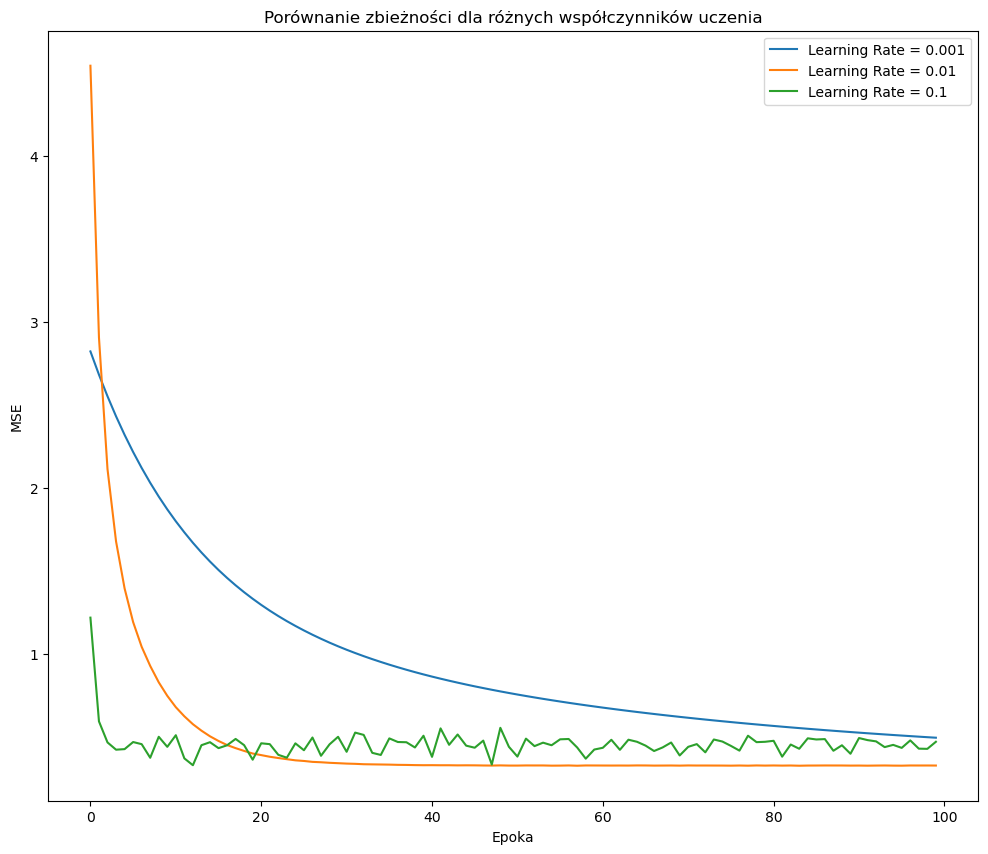

In [5]:
# Wykres MSE dla różnych współczynników uczenia
plt.figure(figsize=(12, 10))

for lr in learning_rates:
    plt.plot(results[lr]['errors'], label=f'Learning Rate = {lr}')

plt.title('Porównanie zbieżności dla różnych współczynników uczenia')
plt.xlabel('Epoka')
plt.ylabel('MSE')
plt.legend()
plt.show()

### Zadanie 3 
Wczytać dane z pliku PS3_Dane1. Wykorzystując regułę perceptronową i regułę LMS nauczyć sieć klasyfikacji elementów w tym zbiorze. Porównać wyniki uzyskane dwoma metodami (graficznie). Proszę skomentować uzyskane różnice.

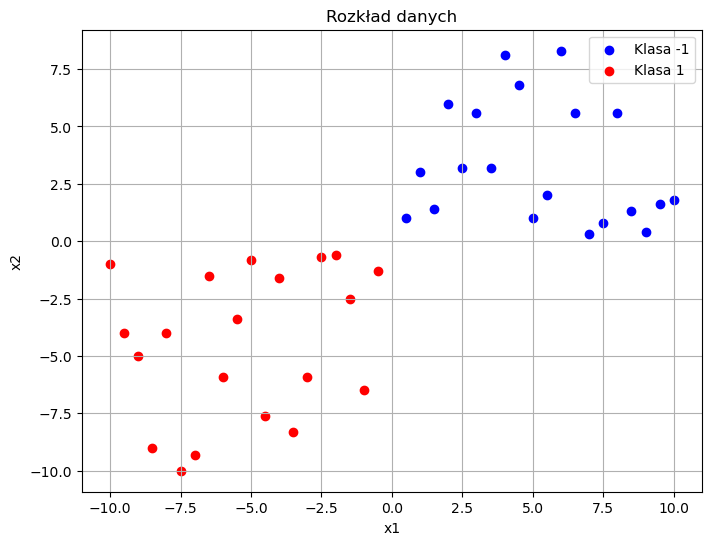

Epoch 100/1000, MSE: 0.0052
Epoch 200/1000, MSE: 0.0046
Epoch 300/1000, MSE: 0.0056
Epoch 400/1000, MSE: 0.0052
Epoch 500/1000, MSE: 0.0046
Epoch 600/1000, MSE: 0.0034
Epoch 700/1000, MSE: 0.0067
Epoch 800/1000, MSE: 0.0051
Epoch 900/1000, MSE: 0.0029
Epoch 1000/1000, MSE: 0.0083
Perceptron zbieżny po 2 epokach.


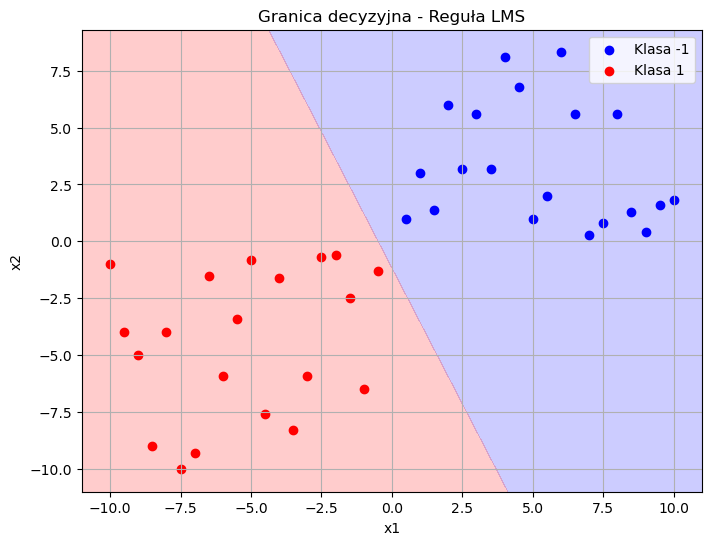

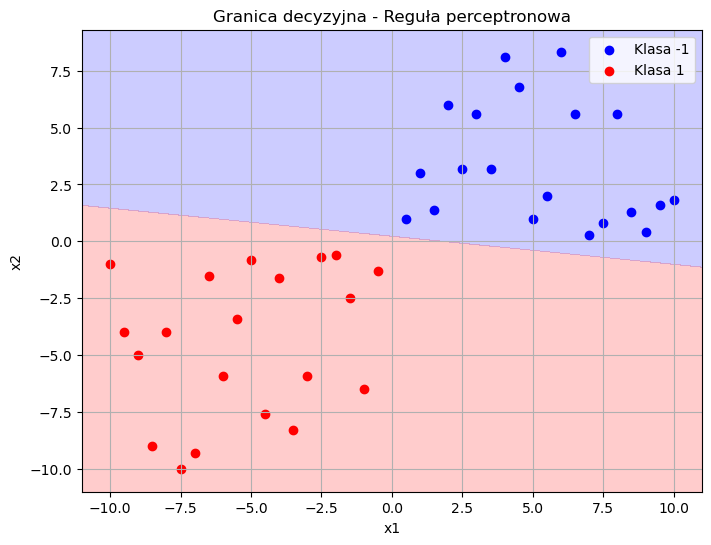

In [6]:
data = np.loadtxt('LMS_dane1.txt', skiprows=1)
X = data[:, :2]
d = data[:, 2]

d_perceptron = np.where(d == 0, -1, 1)
d_lms = np.where(d == 0, -0.1, 0.1)

plt.figure(figsize=(8, 6))
plt.scatter(X[d == 0, 0], X[d == 0, 1], color='blue', label='Klasa -1')
plt.scatter(X[d == 1, 0], X[d == 1, 1], color='red', label='Klasa 1')
plt.title('Rozkład danych')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

def perceptron_learning(X, d, epochs=100, num_neurons=1):
    num_samples, num_features = X.shape
    weights = np.random.rand(num_features, num_neurons)
    bias = np.random.rand(num_neurons)

    for epoch in range(epochs):
        errors = 0
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        X, d = X[indices], d[indices]

        for i in range(num_samples):
            net = np.dot(X[i], weights) + bias
            y = np.where(net >= 0, 1, -1)

            e = d[i] - y

            weights += np.outer(X[i], e)
            bias += e

            errors += np.sum(e != 0)

        if errors == 0:
            print(f'Perceptron zbieżny po {epoch + 1} epokach.')
            break

    return weights, bias, errors

lms_weights, lms_bias, lms_errors, best_epoch = lms_learning(X, d_lms, num_neurons=1, epochs=1000, learning_rate=0.01)

perceptron_weights, perceptron_bias, perceptron_errors = perceptron_learning(X, d_perceptron, epochs=100, num_neurons=1)

def plot_decision_boundary(X, d, weights, bias, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    net = np.dot(grid, weights) + bias
    zz = net.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], alpha=0.2, colors=['blue', 'red'])
    plt.scatter(X[d == -1, 0], X[d == -1, 1], color='blue', label='Klasa -1')
    plt.scatter(X[d == 1, 0], X[d == 1, 1], color='red', label='Klasa 1')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X, d_perceptron, lms_weights, lms_bias, 'Granica decyzyjna - Reguła LMS')

plot_decision_boundary(X, d_perceptron, perceptron_weights, perceptron_bias, 'Granica decyzyjna - Reguła perceptronowa')